In [4]:
# from IPython.core.display import HTML
# HTML("""
# <style>

# div.cell { /* Tunes the space between cells */
# margin-top:1em;
# margin-bottom:1em;
# }

# div.text_cell_render h1 { /* Main titles bigger, centered */
# font-size: 2.2em;
# line-height:1.4em;
# text-align:center;
# }

# div.text_cell_render h2 { /*  Parts names nearer from text */
# margin-bottom: -0.4em;
# }


# div.text_cell_render { /* Customize text cells */
# font-family: 'Times New Roman';
# font-size:1.5em;
# line-height:1.4em;
# padding-left:3em;
# padding-right:3em;
# }
# </style>
# """)

- `jupyter nbconvert Jupyter\ Slides.ipynb --to slides --post serve`

# Plan

- Automatic differentiation
- Deep learning frameworks
- Backpropagation algorithm
- PyTorch for deep learning
- Example

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
plt.rcParams['figure.figsize'] = 16, 12

<img src="images/allframeworks.png" />

# Computational graph

| Addition  | Affine transformation  |
|---|---|
| <img src="images/addition.png" />  | <img src="images/affine_transformation.png" />  |

# Functions of a deep learning framework

Any DL framework have support:
- definition of a computaional graph
- differentiation of a computational graph
- evaluation of a computational graph

# Types of deep learning frameworks

<img src="images/frameworks.png" width=640 />

<img src="images/mytorch.png" />

## Simple function

$$\Large
\begin{array}{rcl}
f\left(x, y\right) = y + y x + y x^2
\end{array}
$$

In [6]:
# let's define a function

def f(x, y):
    return y + y*x + y*x**2

print('f(3, 2) =', f(3, 2))

f(3, 2) = 26


## Analytic derivative of the function

$$\Large
\begin{array}{rcl}
\dfrac{\partial}{\partial x} f\left(x, y\right) = ?
\end{array}
$$

## Analytic derivative of the function

$$\Large
\begin{array}{rcl}
\dfrac{\partial}{\partial x} f\left(x, y\right) = y + 2 y x
\end{array}
$$

In [7]:
# let's define function which returns its derivative wrt x evaluated at a point

def df_dx(x, y):
    return y + 2*y*x

print('df_dx(x, y) =', df_dx(3, 2))

df_dx(x, y) = 14


## Chain rule

$$\Large
\begin{array}{rcl}
\left(f \circ g\right)' &=& \left(f' \circ g\right)\cdot g' \\
\dfrac{\partial f\left(g\left(x\right)\right)}{\partial x} &=& \dfrac{\partial f\left(g\left(x\right)\right)}{\partial g\left(x\right)}\cdot\dfrac{\partial g\left(x\right)}{\partial x}
\end{array}
$$

## Function as Directed Acyclic Graph
- each node is an elementary function
$$\Large
\begin{array}{rcl}
f\left(x, y\right) &=& y + y x + y x^2 \\
g_1\left(x, y\right) &=& x \\
g_2\left(x, y\right) &=& y \\
g_3\left(x, y\right) &=& x^2 = g_1^2 \\
g_4\left(x, y\right) &=& y \cdot x = g_2 \cdot g_1 \\
g_5\left(x, y\right) &=& y + y \cdot x = g_2 + g_4 \\
g_6\left(x, y\right) &=& y \cdot x^2 = g_2 \cdot g_3 \\
g_7\left(x, y\right) &=& f\left(x, y\right) = g_5 + g_6 \\
\end{array}
$$

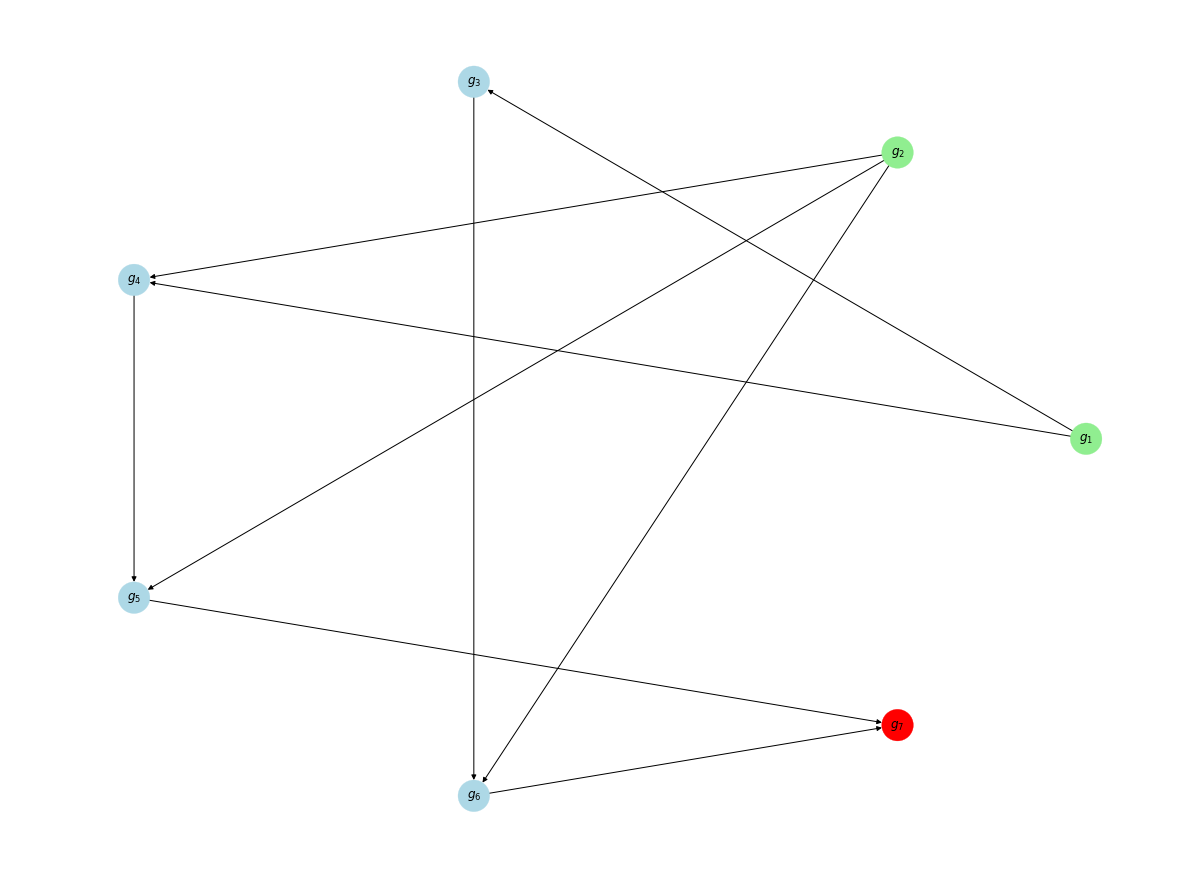

In [8]:
# let's draw computational graph
import networkx as nx

G = nx.OrderedDiGraph()
G.add_node(r'$g_1$')
G.add_node(r'$g_2$')
G.add_node(r'$g_3$')
G.add_edge(r'$g_1$', r'$g_3$')
G.add_node(r'$g_4$')
G.add_edge(r'$g_1$', r'$g_4$')
G.add_edge(r'$g_2$', r'$g_4$')
G.add_node(r'$g_5$')
G.add_edge(r'$g_2$', r'$g_5$')
G.add_edge(r'$g_4$', r'$g_5$')
G.add_node(r'$g_6$')
G.add_edge(r'$g_3$', r'$g_6$')
G.add_edge(r'$g_2$', r'$g_6$')
G.add_node(r'$g_7$')
G.add_edge(r'$g_5$', r'$g_7$')
G.add_edge(r'$g_6$', r'$g_7$')
color_map = []
for node in G:
    if node == r'$g_1$' or node == r'$g_2$':
        color_map.append('lightgreen')
    elif node == r'$g_7$':
        color_map.append('red')
    else:
        color_map.append('lightblue')

nx.draw_circular(G, with_labels=True, node_size=1000, node_color=color_map)

## Differentiation of elementary funtions
$$\Large
\begin{array}{rcl}
\dfrac{\partial g_1}{\partial x} &=& \left. \dfrac{\partial}{\partial x} x = 1 \right|_{x=3, y=2} = 1 \\ \\
\dfrac{\partial g_2}{\partial x} &=& \left. \dfrac{\partial}{\partial x} y = 0 \right|_{x=3, y=2} = 0 \\ \\
\dfrac{\partial g_3}{\partial x} &=& \left. \dfrac{\partial}{\partial x} g_1^2 = 2 g_1 \dfrac{\partial g1}{\partial x} = 2x \right|_{x=3, y=2} = 6 \\ \\
\dfrac{\partial g_4}{\partial x} &=& \left. \dfrac{\partial}{\partial x} g_2 \cdot g_1 = g_2 \dfrac{\partial g_1}{\partial x} + \dfrac{\partial g_2}{\partial x} g_1 = g_2 = y \right|_{x=3, y=2} = 2 \\ \\
\dfrac{\partial g_5}{\partial x} &=& \left. \dfrac{\partial}{\partial x}\left(g_2 + g_4\right) = \dfrac{\partial g_2}{\partial x} + \dfrac{\partial g_4}{\partial x} = g_2 = y \right|_{x=3, y=2} = 2 \\ \\
\dfrac{\partial g_6}{\partial x} &=& \left. \dfrac{\partial}{\partial x} g_2 \cdot g_3 = g_2 \dfrac{\partial g_3}{\partial x} + \dfrac{\partial g_2}{\partial x} g_3 = y \cdot 2x \right|_{x=3, y=2} = 12 \\ \\
\dfrac{\partial g_7}{\partial x} &=& \left. \dfrac{\partial}{\partial x}\left(g_5 + g_6\right) = \dfrac{\partial g_5}{\partial x} + \dfrac{\partial g_6}{\partial x} = y + 2xy \right|_{x=3, y=2} = 14 \\ \\
\dfrac{\partial f}{\partial x} &=& \left. \dfrac{\partial f}{\partial g_7} \cdot \dfrac{\partial g_7}{\partial x} = y + 2xy \right|_{x=3, y=2} = 14
\end{array}
$$

## Auto differentiation
- we calculate value of the function and its derivative w.r.t. $x$ in a point **simultaneously**

In [9]:
# let's write a class which can automaticall calculate derivative wrt x

class Variable:
    
    def __init__(self, value, derivative):
        self.value = value
        self.derivative = derivative

    def __add__(self, other):
        return Variable(
            self.value + other.value,
            self.derivative + other.derivative
        )
    
    def __mul__(self, other):
        return Variable(
            self.value * other.value,
            self.derivative * other.value + self.value * other.derivative
        )

    def __pow__(self, other):
        return Variable(
            self.value ** other,
            other * self.value ** (other - 1)
        )
    
    def __repr__(self):
        return 'v=%s, d=%s' % (str(self.value), str(self.derivative))

In [10]:
# let's compare AD result with analytical calculation

var_x = Variable(3, 1)
var_y = Variable(2, 0)

var_y + var_y*var_x + var_y*var_x**2

v=26, d=14

<img src="images/pytorch.png" />

In [11]:
import numpy as np

import torch
from torch.autograd import Variable

In [12]:
# now let's use pyTorch Variable instead ours

x = torch.FloatTensor(np.array([3]))
y = torch.FloatTensor(np.array([2]))

var_x = Variable(x, requires_grad=True)
var_y = Variable(y, requires_grad=True)

z = var_y + var_y*var_x + var_y*var_x**2
z.backward()

print(z, var_x.grad, var_y.grad)

tensor([ 26.]) tensor([ 14.]) tensor([ 13.])


<img src="images/tensor.png" width=640 />

- A **torch.Tensor** is a multi-dimensional matrix containing elements of a single data type.
  - https://pytorch.org/docs/stable/tensors.html
- behaviour of **torch.Tensor** is more or less similar to what you expect from numpy
  - constructors, type conversion, indexing, etc

|Data type | dtype | CPU tensor |
|----------|-------|------------|
|32-bit floating point | torch.float32 or torch.float | torch.FloatTensor |
|64-bit floating point | torch.float64 or torch.double | torch.DoubleTensor |
|16-bit floating point | torch.float16 or torch.half | torch.HalfTensor |
|8-bit integer (unsigned) | torch.uint8 | torch.ByteTensor |
|8-bit integer (signed) | torch.int8 | torch.CharTensor |
|16-bit integer (signed) | torch.int16 or torch.short | torch.ShortTensor |
|32-bit integer (signed) | torch.int32 or torch.int | torch.IntTensor |
|64-bit integer (signed) | torch.int64 or torch.long | torch.LongTensor |


In [13]:
# we can crate tensor given size with a garbage

x = torch.IntTensor(4, 2)

print(x.shape)
print(x.dtype)
print(x)

torch.Size([4, 2])
torch.int32
tensor([[ 1.0582e+09,  3.2651e+04],
        [ 9.0297e+07,  0.0000e+00],
        [ 8.7637e+08,  3.2651e+04],
        [ 1.0920e+07,  0.0000e+00]], dtype=torch.int32)


In [14]:
# we can crate tensor from list

x = torch.IntTensor([[1, 2], [3, 4]])

print(x.shape)
print(x.dtype)
print(x)

torch.Size([2, 2])
torch.int32
tensor([[ 1,  2],
        [ 3,  4]], dtype=torch.int32)


In [15]:
# we can crate tensor numpy

x = torch.from_numpy(
    np.random.binomial(10, 0.25, size=(3, 2)).astype(np.uint8)
)

print(x.shape)
print(x.dtype)
print(x)

torch.Size([3, 2])
torch.uint8
tensor([[ 4,  2],
        [ 3,  4],
        [ 1,  3]], dtype=torch.uint8)


In [16]:
# we can init tensor with zeros or ones of selected type

x = torch.zeros((3, 2), dtype=torch.float64)
y = torch.ones((3, 2), dtype=torch.float64)

print(x.shape)
print(x.dtype)
print(x)

torch.Size([3, 2])
torch.float64
tensor([[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]], dtype=torch.float64)


In [17]:
# we can init tensor with any value

x = torch.FloatTensor(3, 2).fill_(11)

print(x.shape)
print(x.dtype)
print(x)

torch.Size([3, 2])
torch.float32
tensor([[ 11.,  11.],
        [ 11.,  11.],
        [ 11.,  11.]])


In [18]:
# we can sample random tensor from a distribution

x = torch.zeros((3, 2, 2), dtype=torch.float32).normal_(0, 1)

print(x.shape)
print(x.dtype)
print(x)

torch.Size([3, 2, 2])
torch.float32
tensor([[[ 0.7994, -0.6918],
         [-1.2661,  2.5414]],

        [[-0.5406,  0.7869],
         [-0.9609, -0.9793]],

        [[-0.3016,  1.0421],
         [ 0.8090,  2.3168]]])


In [19]:
# we can change type of tensor

x = torch.zeros((3, 2, 2), dtype=torch.float32).normal_(0, 1).double()

print(x.shape)
print(x.dtype)
print(x)

torch.Size([3, 2, 2])
torch.float64
tensor([[[-0.8721,  0.6171],
         [-0.3237,  0.2102]],

        [[-0.3559,  0.8682],
         [-0.5206,  1.4422]],

        [[-0.0168, -0.1851],
         [-0.0325,  0.4553]]], dtype=torch.float64)


In [20]:
# you can reshape it (yes, it still will be differentiable)

x = torch.from_numpy(
    np.arange(12).astype(np.int32).reshape((3, 4))
).reshape((3, 2, 2))

print(x.shape)
print(x.dtype)
print(x)

torch.Size([3, 2, 2])
torch.int32
tensor([[[  0,   1],
         [  2,   3]],

        [[  4,   5],
         [  6,   7]],

        [[  8,   9],
         [ 10,  11]]], dtype=torch.int32)


In [21]:
# you ran index tensors an it would be numpy array

batch_size = 10
channels = 3
wight = 100
height = 100

batch = torch.FloatTensor(batch_size, channels, wight, height).normal_(0, 1)

print(batch.shape)
print(batch.dtype)
print(batch[1, 1, :4, :4])

torch.Size([10, 3, 100, 100])
torch.float32
tensor([[ 0.6588, -0.4147,  0.5716, -0.0323],
        [ 0.7451, -0.1492,  1.9442,  1.1323],
        [ 0.4084, -0.5069, -1.7929, -1.1909],
        [-0.8499, -0.2209, -0.7999, -0.6901]])


# Operations 
<img src="images/implicit.png" width=640 />

In [22]:
# if operation doesn't change shape and type then it has inplace alternative

x = torch.ones((2, 2), dtype=torch.float32)
y = torch.ones((2, 2), dtype=torch.float32)

z = x.add(y)
z = torch.add(x, y)
z = x + y
x.add_(y)

tensor([[ 2.,  2.],
        [ 2.,  2.]])

Too many of different operations:
- Point-wise operations
  - `abs`, `cos`, `atan`, ...
- Reduction operations
  - `cumsum`, `mean`, `sum`, ...
- Comparison operation
  - `eq`, `ge`, `max`, ...
- Matrix-Matrix operations
  - `dot`, `addmm`, ...
- ...

# Broadcasting
<img src="images/broadcasting.png" width=640 />

Two tensors are _broadcastable_ if the following rules hold:
- Each tensor has at least one dimension.
- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

If two tensors `x`, `y` are _broadcastable_, the resulting tensor size is calculated as follows:
- If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.
- Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.

https://pytorch.org/docs/stable/notes/broadcasting.html

In [23]:
# image normalization, straightforward way

batch_size = 10
channels = 3
wight = 100
height = 100

batch = torch.FloatTensor(batch_size, channels, wight, height).fill_(2)
print(batch.shape)

r_mean = torch.FloatTensor(100, 100).fill_(1)
g_mean = torch.FloatTensor(100, 100).fill_(1)
b_mean = torch.FloatTensor(100, 100).fill_(1)
rgb_mean = torch.stack(
    [torch.stack([r_mean, g_mean, b_mean])]*batch.shape[0]
)
print(rgb_mean.shape)
print(np.prod(rgb_mean.shape))

print((batch - rgb_mean)[0, 0, :3, :3])

torch.Size([10, 3, 100, 100])
torch.Size([10, 3, 100, 100])
300000
tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])


In [24]:
# image normalization, broadcasting way

batch_size = 10
channels = 3
wight = 100
height = 100

batch = torch.FloatTensor(batch_size, channels, wight, height).fill_(2)
print(batch.shape)

rgb_mean = torch.FloatTensor([1, 1, 1]).reshape((3, 1, 1))
print(rgb_mean.shape)

print((batch - rgb_mean)[0, 0, :3, :3])

torch.Size([10, 3, 100, 100])
torch.Size([3, 1, 1])
tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])


In [25]:
# numpy <-> tensor

x = torch.ones((3, 2))
y = x.numpy()
z = torch.from_numpy(y)

# Using GPU
<img src="images/gpu.jpg" width=640 />

In [26]:
x = torch.FloatTensor(1500, 3, 224, 224)
print(x.is_cuda)
print(np.prod(x.shape)*4/1024**2)
print(torch.cuda.memory_allocated()/1024**2)

False
861.328125
0.8251953125


In [27]:
!nvidia-smi

Thu Jun 28 19:55:30 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.81                 Driver Version: 384.81                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   51C    P0    48W / 240W |     10MiB /  8112MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:03:00.0 Off |                  N/A |
|  0%   43C    P2    73W / 320W |    521MiB / 11172MiB |     10%      Default |
+-------------------------------+----------------------+----------------------+
        

In [28]:
x = x.cuda()
print(x.is_cuda)

True


In [29]:
!nvidia-smi

Thu Jun 28 19:55:31 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.81                 Driver Version: 384.81                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   51C    P0    48W / 240W |     10MiB /  8112MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:03:00.0 Off |                  N/A |
|  0%   45C    P2    96W / 320W |   1383MiB / 11172MiB |    100%      Default |
+-------------------------------+----------------------+----------------------+
        

In [30]:
print(np.prod(x.shape)*4/1024**2)
print(torch.cuda.memory_allocated()/1024**2)

861.328125
862.2001953125


In [31]:
x = x.cpu()
print(x.is_cuda)
print(torch.cuda.memory_allocated()/1024**2)

False
0.8251953125


In [32]:
import gc
del(x)
gc.collect()

print(torch.cuda.memory_allocated()/1024**2)

0.8251953125


In [33]:
!nvidia-smi

Thu Jun 28 19:55:32 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.81                 Driver Version: 384.81                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   51C    P0    48W / 240W |     10MiB /  8112MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:03:00.0 Off |                  N/A |
|  0%   45C    P2    97W / 320W |   1383MiB / 11172MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [34]:
with torch.cuda.device(0):
    x = torch.FloatTensor(1500, 3, 224, 224).cuda()
with torch.cuda.device(1):
    y = torch.FloatTensor(1500, 3, 224, 224).cuda()

In [35]:
!nvidia-smi

Thu Jun 28 19:55:36 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.81                 Driver Version: 384.81                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   52C    P2    45W / 240W |   1343MiB /  8112MiB |     36%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:03:00.0 Off |                  N/A |
|  0%   44C    P2    74W / 320W |   1383MiB / 11172MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [36]:
del(x, y)
gc.collect()

175

# pyTorch = Numpy + AD + GPU

<img src="images/puzzle.jpg" width=640 />

In [37]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

data = load_iris()
data.data = StandardScaler().fit_transform(data.data)
print(data.data.shape)
print(data.feature_names)
print(data.data[:5, :])
print(data.target_names)
print('Target:')
print(pd.Series(data.target).value_counts())

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]
['setosa' 'versicolor' 'virginica']
Target:
2    50
1    50
0    50
dtype: int64


# Logistic Regression

Assume we have $K$ classes and $N$ sample in a dataset $D$:

$$\Large
\begin{array}{rcl}
P\left(y = k \mid \vec{x}\right) &=& \dfrac{P\left(\vec{x} \mid y = k\right)P\left(y = k\right)}{\sum_{i = 1}^k P\left(\vec{x} \mid y = i\right)P\left(y = i\right)} \\
P\left(y = k \mid \vec{x}\right) &=& \dfrac{e^{\vec{w}_k \cdot \vec{x}}}{\sum_{i = 1}^k e^{\vec{w}_i \cdot \vec{x}}} = \text{softmax}\left(\vec{w}_k \cdot \vec{x}\right) \\
\hat{p}_{kn} &=& P\left(y = k \mid \vec{x}_n\right)
\end{array}
$$

# Cost function

We use cross entropy as a loss, assume that we have :

$$\Large
\begin{array}{rcl}
\mathcal{L}\left(D\right) &=& -\sum_{n=1}^N \sum_{k=1}^K p_{kn} \log \hat{p}_{kn} \\
&=& -\sum_{n=1}^N \sum_{k=1}^K I\left[y = k\right] \log P\left(y = k \mid \vec{x}_n\right)
\end{array}
$$

In [38]:
# prepare data matrix
X = torch.from_numpy(np.column_stack([np.ones(data.data.shape[0]), data.data])).float()

# prepare target variable
y = data.target

# initialize parameters of the logistic regression
W = Variable(
    torch.FloatTensor(X.shape[1], np.unique(y).shape[0]).normal_(0, 0.1), 
    requires_grad=True)

print(W)

tensor([[-0.0009,  0.0688, -0.0243],
        [ 0.0604,  0.0069,  0.0323],
        [-0.0388, -0.0308,  0.0195],
        [ 0.1750,  0.1549,  0.1104],
        [ 0.0550, -0.0095,  0.0995]])


HBox(children=(IntProgress(value=0), HTML(value='')))

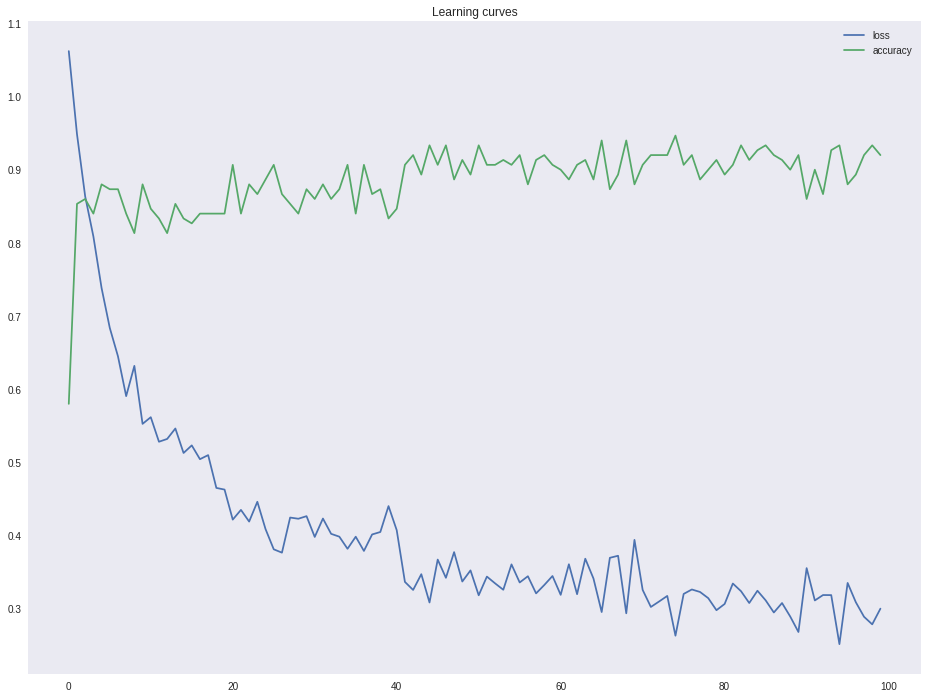

In [39]:
from tqdm import tqdm_notebook

# parameters of learning algorithm - SGD
learning_rate = 0.001
n_epoches = 100
tolerance = 1e-8

# logging
loss_glog = []
acc_glob = []

# epoch - one pass through dataset
for ix_epoch in tqdm_notebook(range(n_epoches)):
    acc_epoch = 0
    loss_epoch = 0
    # iterate over dataset
    for n in np.random.choice(range(X.shape[0]), size=X.shape[0]):
        # prepare variable without gradients
        x = Variable(X[n, :])

        # compute softmax
        log_p = torch.mv(W.t(), x)
        p_numerator = torch.exp(log_p)
        p_denominator = p_numerator.sum()
        p = p_numerator/p_denominator

        # check prediction
        k = p.argmax(0).item()
        acc_epoch += y[n] == k

        # compute loss
        loss = -torch.log(
            torch.clamp(p[y[n]], tolerance, 1 - tolerance)
        )
        loss_epoch += loss.item()

        # propagate grawients - modify current parameters
        loss.backward()
        W.data -= learning_rate*W.grad
        W.grad.zero_()
        
    # save epoch stats
    acc_glob.append(acc_epoch/X.shape[0])
    loss_glog.append(loss_epoch/X.shape[0])
    
# plot logs
plt.plot(loss_glog, label='loss')
plt.plot(acc_glob, label='accuracy')
plt.legend()
plt.title('Learning curves')
plt.show()

# Logistic regression = NN with one linear layer + Softmax activation

<img src="images/lr.png" />

HBox(children=(IntProgress(value=0), HTML(value='')))

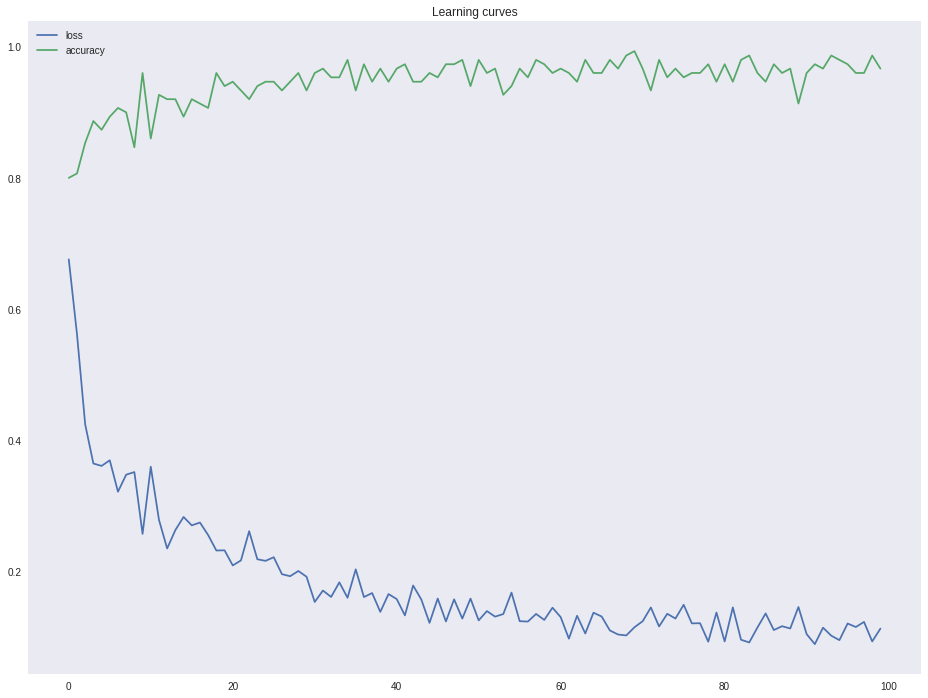

In [40]:
from torch import nn
from torch import optim

# create one linear layer 
model = nn.Sequential()
model.add_module(
    'linear',
    nn.Linear(X.shape[1], np.unique(y).shape[0], bias=False)
)

# create cross entropy loss
criterion = nn.CrossEntropyLoss()

# create SGD optimizer without momentum
optimizer = optim.SGD(
    model.parameters(), 
    lr=0.01, 
    momentum=0.0
)

loss_glog = []
acc_glob = []

for ix_epoch in tqdm_notebook(range(n_epoches)):
    acc_epoch = 0
    loss_epoch = 0
    for n in np.random.choice(range(X.shape[0]), size=X.shape[0]):
        x = Variable(X[n, :].reshape(1, X.shape[1]))
        yi = Variable(torch.from_numpy(np.array([y[n]]).astype(np.int64)))
        
        # calculate log of probabilities
        log_p = model(x)
        
        # calculate loss
        loss = criterion(log_p, yi)
        
        # make gradient step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_epoch += loss.item()
        k = log_p.argmax(1).item()
        acc_epoch += y[n] == k
        
    acc_glob.append(acc_epoch/X.shape[0])
    loss_glog.append(loss_epoch/X.shape[0])
    

plt.plot(loss_glog, label='loss')
plt.plot(acc_glob, label='accuracy')
plt.legend()
plt.title('Learning curves')
plt.show()

# Module: torch.nn
- Containers
  - `nn.Sequential`
  - `nn.ModuleList`
  - ...
- Convolution layers
  - `nn.Conv2d`
  - `nn.ConvTranspose2d`
  - ...
- Pooling layers
  - `nn.MaxPool2d`
  - `nn.AvgPool3d`
  - ...
- Padding layers
  - `nn.ReflectionPad1d`
  - `nn.ZeroPad2d`
  - ...
- Non-linear activations
  - `nn.Sigmoid`
  - `nn.ReLU6`
  - ...
- Normalization layers
  - `nn.BatchNorm2d`
  - `nn.LocalResponseNorm`
  - ...
- Recurrent layers
  - `nn.LSTM`
  - `nn.GRU`
  - ...
- Other layers
  - Dropout layers
  - Sparse layers
- Distance functions
- Loss functions
- Vision layers
- DataParallel layers

# Module: torch.optim

- `optim.Adadelta`
  - ADADELTA: An Adaptive Learning Rate Method
- `optim.Adagrad`
  - Adaptive Subgradient Methods for Online Learning and Stochastic Optimization
- `optim.Adam`
  - Adam: A Method for Stochastic Optimization
- `optim.SparseAdam`
- `optim.Adamax`
  - Adam: A Method for Stochastic Optimization
- `optim.ASGD`
  -  Acceleration of stochastic approximation by averaging
- `torch.optim.LBFGS`
- `optim.RMSprop`
- `optim.Rprop`
- `optim.SGD`
  - On the importance of initialization and momentum in deep learning

## Adjusting LR
- `optim.lr_scheduler.LambdaLR`
- `optim.lr_scheduler.StepLR`
- `optim.lr_scheduler.MultiStepLR`
- ...

<img src="images/gan.png" width=640 />

In [41]:
from torchvision import datasets
from torchvision import transforms

ds = datasets.MNIST(
    '/home/mephistopheies/tmp/mnist/', 
    download=True,
    transform=transforms.ToTensor()
)


print(len(ds))

60000


torch.Size([1, 28, 28])


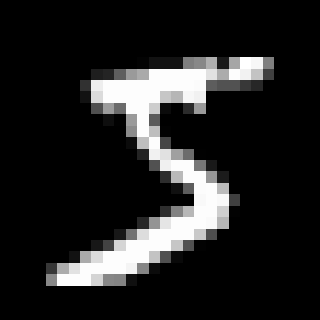

In [42]:
from PIL import Image

img, y = ds[0]

print(img.shape)

Image.fromarray((img[0, :, :].numpy()*255).astype(np.uint8)).resize((320, 320))

In [43]:
ds = torch.utils.data.TensorDataset(
    torch.stack([ds[i][0] for i in range(len(ds))]).cuda(),
    torch.stack([ds[i][1] for i in range(len(ds))]).cuda()
)

print(len(ds))

60000


In [57]:
import itertools as it

batch_size = 50

data_loader = torch.utils.data.DataLoader(    
        ds,
        batch_size=batch_size, 
        shuffle=True,
        num_workers=0,
        pin_memory=False
)

for X, y in tqdm_notebook(data_loader, total=int(np.floor(len(ds)/batch_size)) + 1):
    print(X.shape, X.is_cuda)
    print(y.shape, y.is_cuda)
    break
    
# data_loader_cycle = it.cycle(data_loader)

HBox(children=(IntProgress(value=0, max=1201), HTML(value='')))

torch.Size([50, 1, 28, 28]) True
torch.Size([50]) True


torch.Size([25, 10])
torch.Size([25, 243])
torch.Size([25, 3, 9, 9])
torch.Size([25, 6, 16, 16])
torch.Size([25, 9, 30, 30])
torch.Size([25, 1, 28, 28])


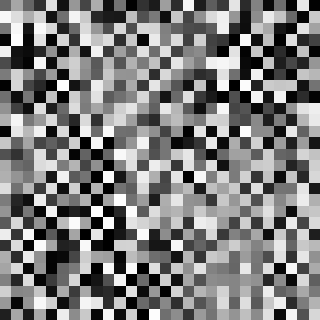

In [169]:
import torch.nn.functional as F
from collections import OrderedDict

input_dim = 10

class Generator(nn.Module):
    
    def __init__(self, input_dim=10):
        super(Generator, self).__init__()
        self.linear = nn.Linear(input_dim, 3*9*9, bias=False)
        self.bn1 = nn.BatchNorm1d(3*9*9)
        self.tconv1 = nn.ConvTranspose2d(
            in_channels=3, 
            out_channels=6, 
            kernel_size=4, 
            stride=2, 
            padding=2, 
            bias=False)
        self.bn2 = nn.BatchNorm2d(6)
        self.tconv2 = nn.ConvTranspose2d(
            in_channels=6, 
            out_channels=9, 
            kernel_size=4, 
            stride=2, 
            padding=2, 
            bias=False)
        self.bn3 = nn.BatchNorm2d(9)
        self.proj = nn.Conv2d(
            in_channels=9, 
            out_channels=1, 
            kernel_size=3, 
            stride=1, 
            padding=0, 
            bias=False)
        self.bn4 = nn.BatchNorm2d(1)
    
    def forward(self, X, debug=False):
        if debug: 
            print(X.shape)
        X = self.linear(X)
        if debug: 
            print(X.shape)
        X = self.bn1(X)
        X = F.relu(X)   
        X = X.view(-1, 3, 9, 9)
        if debug: 
            print(X.shape)
        X = self.tconv1(X)
        if debug: 
            print(X.shape)
        X = self.bn2(X)
        X = F.relu(X)
        X = self.tconv2(X)
        if debug: 
            print(X.shape)
        X = self.bn3(X)
        X = F.relu(X)
        X = self.proj(X)
        X = self.bn4(X)
        X = F.tanh(X)
        if debug: 
            print(X.shape)
        return X
    
generator = Generator(input_dim)


X = Variable(torch.FloatTensor(25, 10).normal_(0, 1))
X = generator(X, debug=True)

img = X[0, 0, :].data.numpy()

Image.fromarray((255*(img + 1)/2).astype(np.uint8)).resize((320, 320))

In [174]:
class Discriminator(nn.Module):
    
    def __init__(self, input_width=28, input_height=28):
        super(Discriminator, self).__init__()
        self.seq_conv = nn.Sequential(
            nn.Conv2d(1, 3, 4, 2, 0, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(3, 6, 4, 2, 0, bias=False),
            nn.BatchNorm2d(6),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(6, 12, 4, 2, 1, bias=False),
            nn.BatchNorm2d(12),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(12, 24, 2, 1, 0, bias=False),
            nn.BatchNorm2d(24),
            nn.LeakyReLU(0.2, inplace=True),
        )
        self.linear = nn.Linear(24, 1, bias=False)        
        
    def forward(self, X):
        X = self.seq_conv(X)
        X = X.view(-1, 24)
        X = self.linear(X)
        return F.sigmoid(X).view(-1)
    

discriminator = Discriminator()

print(discriminator(X).shape)

discriminator(X)

torch.Size([25])


tensor([ 0.5072,  0.5486,  0.4804,  0.4718,  0.5570,  0.5858,  0.6091,
         0.4965,  0.5298,  0.4113,  0.5234,  0.4464,  0.5307,  0.5282,
         0.5074,  0.6258,  0.5250,  0.5954,  0.5925,  0.6601,  0.5931,
         0.5762,  0.6218,  0.4870,  0.4193])

In [177]:
lr = 0.0002
beta1 = 0.5

criterion = nn.BCELoss()

optimizerD = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))

In [182]:
for ix_iter, data in enumerate(data_loader):
    ############################
    # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
    ###########################
    # train with real
    discriminator.zero_grad()
#     real_cpu = data[0].to(device)
#     batch_size = real_cpu.size(0)
#     label = torch.full((batch_size,), real_label, device=device)

#     output = netD(real_cpu)
#     errD_real = criterion(output, label)
#     errD_real.backward()
#     D_x = output.mean().item()

#     # train with fake
#     noise = torch.randn(batch_size, nz, 1, 1, device=device)
#     fake = netG(noise)
#     label.fill_(fake_label)
#     output = netD(fake.detach())
#     errD_fake = criterion(output, label)
#     errD_fake.backward()
#     D_G_z1 = output.mean().item()
#     errD = errD_real + errD_fake
#     optimizerD.step()

#     ############################
#     # (2) Update G network: maximize log(D(G(z)))
#     ###########################
#     netG.zero_grad()
#     label.fill_(real_label)  # fake labels are real for generator cost
#     output = netD(fake)
#     errG = criterion(output, label)
#     errG.backward()
#     D_G_z2 = output.mean().item()
#     optimizerG.step()

    break